#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Algoritmo $k-NN$: k-Nearest Neighbors**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#Introdução

Geração de conjuntos de valores e plotagens para ilustrar os conceitos da representação de valores como pontos em um espaço $n-$dimensional e a analisar a distância entre estes pontos.

Esta intuição é básica para estudo e aplicação dos algoritmos $k-NN$.

Detalhes sobre estes conceitos e o algoritmos disponíveis no notebook: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_knn.ipynb


In [ ]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

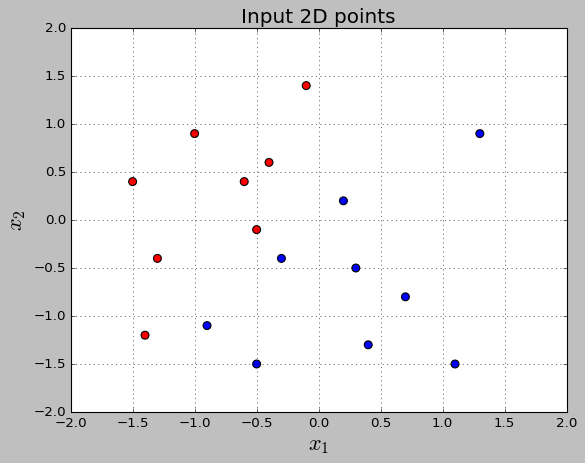

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

O $k-NN$ analisa a distribuição espacial dos pontos em um conjunto de dados, como no visualização acima, buscando identificar similaridades de acordo com a distância entre eles.

---

Na próxima visualização é gerada uma matriz da distância entre cada par de pontos em uma matriz. Neste caso está sendo usada a *distância Euclidiana*, devido definição do parâmetro p=2. Para tanto é usada a equação descrita a seguir.

Distância Euclidiana (Norma $L_2$):

$
L_2(u,v) = ||u,v||_2 = \sqrt{\sum_{i=1}^{n}(u_i-v_i)^2}
$

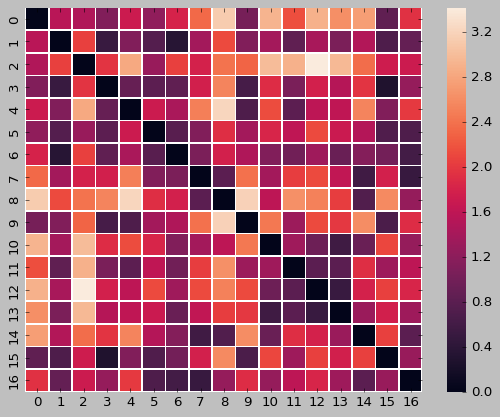

In [ ]:
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pylab as plt

dists = distance_matrix(X, X, p = 2)

ax = sns.heatmap(dists, linewidth=0.5)
plt.show()

Aqui é exibido o cálculo individualizado da distância entre dois pontos diferentes do conjunto de dados.

In [ ]:
print(X[3,:])
print(X[15,:])
print(np.sqrt(np.square(X[3,0]-X[15,0]) + np.square(X[3,1]-X[15,1])))

[-0.6  0.4]
[-0.4  0.6]
0.28284271247461895


**Ilustração da aplicação do $k-NN$ como regressor ou como classificador:**

![alt text](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

Nas próximas seções realizaremos a aplicação prática destas abordagens para o algoritmo.

#1 Aplicação do $k-NN$ como Classificador

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

##1.1 Carga e separação do conjunto de dados

In [ ]:
#Dataset iris
iris = datasets.load_iris()

X = iris.data    # data matrix
y = iris.target  # response vector

Separação do conjunto de dados em treinamento e teste

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

##1.2 Criação e aplicação do modelo de classificação

Criação do classificador $k-NN$ e treinamento do modelo

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=3) # k = 3
modelKNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Uso do modelo para classificação de um exemplo específico e posteriormente de todo o conjunto de dados de teste

In [ ]:
# predict the class for example x = [1.1, 1.2, 3, 2] 
x = [1.1, 1.2, 3, 2]
print(modelKNN.predict([x]))

[1]


In [ ]:
y_pred_prob_KNN = modelKNN.predict(test_X)

# Imprime as estimativas de probabilidades para cada classe
print(y_pred_prob_KNN)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


#2 Aplicação do $k-NN$ como Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

##2.1 Carga e separação do conjunto de dados

In [ ]:
#Carga do dataset
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
#Criação do data frame com os dados
boston_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]


In [ ]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99891a37d0>,
      dtype=object)

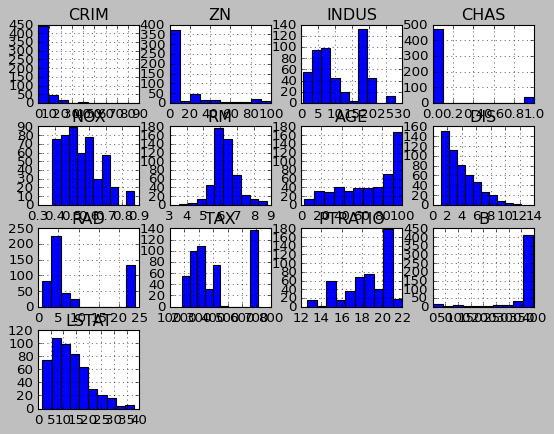

In [ ]:
boston_df.hist()

In [ ]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
#Separação de conjunto de dados de treino e teste
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=31)

##2.2 Normalização das características

In [ ]:
#Normalização das características usando z-Score
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
boston_df = pd.DataFrame(X_train_scaled, columns = dataset.feature_names)
print(boston_df.head(3))

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.389279  3.411723 -1.329831  ... -0.561453  0.294711 -1.125821
1 -0.386258  0.716968  0.573843  ... -0.028004  0.436368 -0.262037
2 -0.380684  0.369258 -0.607546  ...  0.149813  0.373055  0.171983

[3 rows x 13 columns]


##2.3 Treinamento e aplicação do modelo

In [ ]:
# In a practical setting, n_neighbors has to be defined using model selection.
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

model.fit(X_train_scaled, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')

In [ ]:
y_pred = model.predict(X_test_scaled) #make prediction on test set

In [ ]:
#Avaliação do modelo
error = sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
rmse_val = []
rmse_val.append(error) #store rmse values
#print('RMSE value for k=%d is %.2f' % (K, error))
print(rmse_val)

[4.366723535719226]


##2.4 Uso do modelo treinado para predição no conjunto de teste


In [ ]:
#predicting on the test set
predict = model.predict(X_test_scaled)
print(predict)

[29.783 11.201 22.586 19.376 22.128 23.881 13.128 26.592 23.688 22.418
 11.606 17.702 16.594 19.675 13.713 23.337 21.392 24.27  23.008 27.958
 18.106 15.248 26.038 30.979 21.404 20.116 19.042 23.295 18.399 25.03
 27.251 14.544 14.685 17.866 23.774 21.02  29.231 13.379 15.242 38.275
 11.431 12.536 16.827 30.21  17.134 22.723 30.241 19.589 25.58  26.159
 21.171 19.024 12.078 30.355 20.837 20.8   12.814 17.747 11.989 24.998
 17.093 12.806 23.118 27.765 10.592 10.548 23.25  16.361 36.611 21.263
 19.585 15.471 31.676 20.618 17.081 33.35  22.799 21.39  17.166 21.429
 32.628 24.825 24.528 11.706 23.024 21.366 18.886 42.17  21.524 16.439
 12.618 21.192 22.026 30.619 11.985 10.887 24.385 30.916 12.544 27.433
 21.558 14.269 32.261 30.064 10.976 26.858 20.612 18.179 15.436 36.457
 24.645 21.739 18.934 19.179 12.228 16.875 25.953 15.263 25.102 11.272
 15.596 24.096 27.608 26.117 21.221 18.752 16.432 26.791 12.165 11.754
 26.698 17.369 22.226 23.688 22.647 30.091 28.373 11.636 19.501 20.782
 35.805

#Considerações Finais

Alternatives do avoid overfitting*:
* No optimal number of neighbors suits all kind of datasets. The value of $k$ for a particular dataset can be determined using model selection.
* Contrary to what one might think, $k$-NN can produce very complex decision boundaries.
* Model selection (measure performance on validation data for increasing values of k);
* Replace a bunch of points by their prototypes; 
* Remove outliers, i.e., remove data points for which all (or at least the majority) of the neighbor voronoi cells are from a different class.

*Considereções finais adpatadas do tutorial k-NN do Prof. Eduardo Bezerra.

#Referências e Links

**Referências**

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

---
Conteúdos adicionais e explicações detalhadas do algoritmo em:

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_knn.ipynb